<a name='0'></a>

# Task: Create a model based on CNN for Real World Dataset and Image Augmentation

<a name='1'></a>

## 1. Intro - Real World Datasets and Image Augmentation

Real world image datasets are not always prepared and most of the time, they are not enough in quantity.

Training an effective computer vision system requires a huge amount of images. That is not always the case though. When [MIT Technology Review asked Andrew Ng. about the size of the data](https://www.technologyreview.com/2021/03/26/1021258/ai-pioneer-andrew-ng-machine-learning-business/) required to build an AI project, he said:

"***Machine learning is so diverse that it’s become really hard to give one-size-fits-all answers. I’ve worked on problems where I had about 200 to 300 million images. I’ve also worked on problems where I had 10 images, and everything in between. When I look at manufacturing applications, I think something like tens or maybe a hundred images for a defect class is not unusual, but there’s very wide variance even within the factory***".


We can not emphasize enough the advantages of having both good and enough data although such blend is not always possible.

Given that sometime we may have a handful of images, how can we go about it? Are there ways to expand the small image dataset? And boost the performance of the machine learning model as a result?

With the advancement of machine learning techniques, it has become possible to add a boost to the performance metrics by just expanding the existing dataset. The technique of synthetizing new data(images) from existing data is called data augmentation.

image datasets can be augmented in various ways including:

* Flipping the image, vertically or horizontally.
* Cropping the image.
* Changing contrast and color of the image.
* Adding noise to the data.
* Rotating the image at a given degree.

Below image summarize all possibilities that can be done in image data augmentation.

![Image Augmentation](https://cdn.hashnode.com/res/hashnode/image/upload/v1623166213173/JTRR1Btgm.png)

<a name='3'></a>

## 2. Getting Started: Real World Datasets and Overfitting

One of the most challenges in training machine learning models on real world datasets is `overfitting`.

A model overfits when it memorized the training data due to insufficient training samples, or lack of diversity in training samples. By doing data augmentation, we are increasing the training samples, as well as introducing some diversity in the images.

It's fair to say that data augmentation is the cure to overfitting. To test that, let's train a quick cat and dog classifier. After that, we will augment the images to ovoid overfitting.

### Without Data Augmentation: Training Cat and Dog Classifier

We are going to see the need of data augmentation by training a cat and dog classifier.

Along the way, we will let the results guide the latter.

<a name='2-1'></a>

### 2.1 Loading and Preparing Cat and Dog Data

#### Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
import os
import zipfile
import matplotlib.pyplot as plt
import numpy as np

#### Getting the data

The version of the data that we are going to use here is a filtered version. Orginally, it contains [over 20.000 images](https://www.microsoft.com/en-us/download/details.aspx?id=54765).

In [2]:
# Load the data into the workspace

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2023-09-06 10:58:39--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.107.207, 74.125.20.207, 74.125.197.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.107.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   154MB/s    in 0.4s    

2023-09-06 10:58:39 (154 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
# Extract the zip file

zip_dir = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(zip_dir, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Now that the images are extracted (you can verify that by looking in Colab directory), let's get the training and validation directories from the main directory.

In [4]:
main_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(main_dir, 'train')
val_dir = os.path.join(main_dir, 'validation')

We will continue with getting the cats and dogs in the above defined directories.

In [5]:
train_cat_dir = os.path.join(train_dir, 'cats')
train_dog_dir = os.path.join(train_dir, 'dogs')

val_cat_dir = os.path.join(val_dir, 'cats')
val_dog_dir = os.path.join(val_dir, 'dogs')

Now, our directories are quite arranged. Let's see peep into the directories.

In [6]:
os.listdir(main_dir)

['train', 'validation', 'vectorize.py']

In [7]:
os.listdir(train_cat_dir)[:10]

['cat.78.jpg',
 'cat.501.jpg',
 'cat.42.jpg',
 'cat.411.jpg',
 'cat.627.jpg',
 'cat.52.jpg',
 'cat.183.jpg',
 'cat.69.jpg',
 'cat.699.jpg',
 'cat.929.jpg']

Let's walk through the directories and see the number of images in each directory.

In [8]:
for dir, dirname, filename in os.walk(main_dir):
  print(f"Found {len(dirname)} directories and {len(filename)} images in {dir}")

Found 2 directories and 1 images in /tmp/cats_and_dogs_filtered
Found 2 directories and 0 images in /tmp/cats_and_dogs_filtered/train
Found 0 directories and 1000 images in /tmp/cats_and_dogs_filtered/train/cats
Found 0 directories and 1000 images in /tmp/cats_and_dogs_filtered/train/dogs
Found 2 directories and 0 images in /tmp/cats_and_dogs_filtered/validation
Found 0 directories and 500 images in /tmp/cats_and_dogs_filtered/validation/cats
Found 0 directories and 500 images in /tmp/cats_and_dogs_filtered/validation/dogs


There are 3000 images, 2000 in training set, 1000 in validation set. Cats and dogs images are evenly splitted.

Let's now generate a dataset to train the model.



#### Preparing the Dataset

In [9]:
from keras.preprocessing.image import ImageDataGenerator

# Rescale the image to values between 0 and 1

train_gen = ImageDataGenerator(rescale=1/255.0)
val_gen = ImageDataGenerator(rescale=1/255.0)

batch_size = 20
image_size = (180,180)

train_data = train_gen.flow_from_directory(train_dir,
                                           batch_size=batch_size,
                                           class_mode='binary',
                                           target_size=image_size)

val_data = val_gen.flow_from_directory(val_dir,
                                           batch_size=batch_size,
                                           class_mode='binary',
                                           target_size=image_size)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Before building a model, let's visualize the images. It's always a best practice.

In [10]:
data_for_viz = tf.keras.preprocessing.image_dataset_from_directory(

          train_dir,
          image_size=(180,180))

Found 2000 files belonging to 2 classes.


In [11]:
def image_viz(dataset):

  plt.figure(figsize=(12, 8))

  index = 0
  for image, label in dataset.take(12):

    index +=1
    ax = plt.subplot(4, 4, index)
    plt.imshow(image[index].numpy().astype("uint8"))
    plt.title(int(label[index]))
    plt.axis("off")

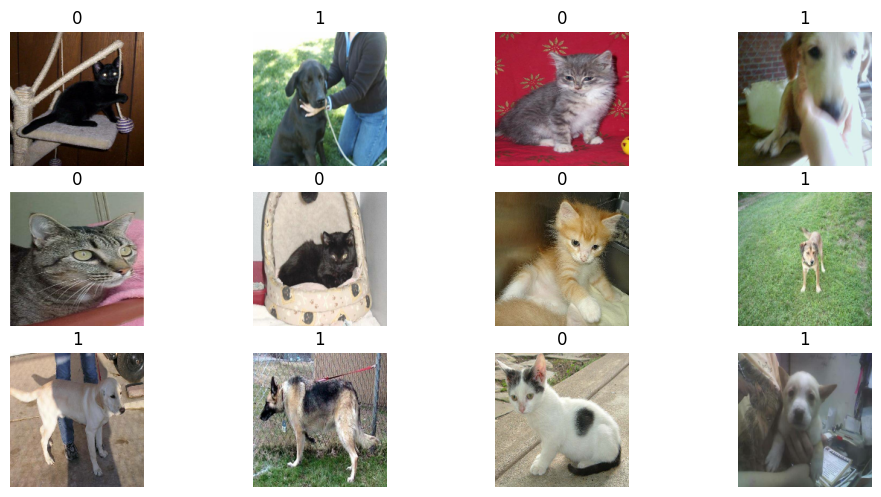

In [12]:
image_viz(data_for_viz)

<a name='2-2'></a>

### 2.2 Building, Compiling and Training a Model

In [13]:
def classifier():

  model = tf.keras.models.Sequential([

    # First convolution and pooling layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(180, 180, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # Second convolution and pooling layer

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Third convolution and pooling layer

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flattening layer for converting the feature maps into 1D column vector

    tf.keras.layers.Flatten(),

    # Fully connected layers

    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

  ])


  # Compiling the model: Specifying optimizer, loss and metric to track during training

  model.compile(

      optimizer=tf.keras.optimizers.RMSprop(),
      loss='binary_crossentropy',
      metrics=['accuracy']
  )

  return model


In [14]:
# Training a model

model = classifier()

train_steps = 2000 / batch_size
val_steps = 1000 / batch_size

history = model.fit(train_data,
          validation_data=val_data,
          epochs=50,
          steps_per_epoch=train_steps,
          validation_steps=val_steps)

Epoch 1/50
100/100 [==============================] - 18s 64ms/step - loss: 0.8047 - accuracy: 0.4985 - val_loss: 0.6902 - val_accuracy: 0.6320
Epoch 2/50
100/100 [==============================] - 5s 52ms/step - loss: 0.6909 - accuracy: 0.5620 - val_loss: 0.6766 - val_accuracy: 0.5730
Epoch 3/50
100/100 [==============================] - 5s 51ms/step - loss: 0.6401 - accuracy: 0.6405 - val_loss: 0.6160 - val_accuracy: 0.6960
Epoch 4/50
100/100 [==============================] - 5s 51ms/step - loss: 0.5914 - accuracy: 0.6810 - val_loss: 0.6053 - val_accuracy: 0.6780
Epoch 5/50
100/100 [==============================] - 6s 61ms/step - loss: 0.5375 - accuracy: 0.7335 - val_loss: 0.5627 - val_accuracy: 0.7190
Epoch 6/50
100/100 [==============================] - 5s 53ms/step - loss: 0.4913 - accuracy: 0.7620 - val_loss: 0.5565 - val_accuracy: 0.7230
Epoch 7/50
100/100 [==============================] - 6s 60ms/step - loss: 0.4481 - accuracy: 0.7975 - val_loss: 0.6102 - val_accuracy: 0.697

<a name='2-3'></a>

### 2.3 Visualizing the Model Results

In [15]:
# function to plot accuracy and loss

def plot_acc_loss(acc, val_acc, loss, val_loss, epochs):

  plt.figure(figsize=(10,5))
  plt.plot(epochs, acc, 'r', label='Training Accuracy')
  plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend(loc=0)

  # Create a new figure with plt.figure()
  plt.figure()

  plt.figure(figsize=(10,5))
  plt.plot(epochs, loss, 'b', label='Training Loss')
  plt.plot(epochs, val_loss, 'y', label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend(loc=0)
  plt.show()

In [16]:
model_history = history.history

acc = model_history['accuracy']
val_acc = model_history['val_accuracy']
loss = model_history['loss']
val_loss = model_history['val_loss']

epochs = history.epoch

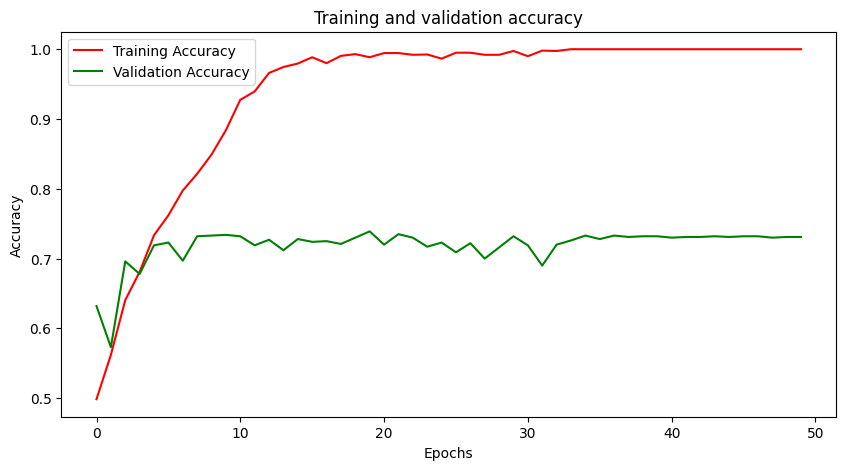

<Figure size 640x480 with 0 Axes>

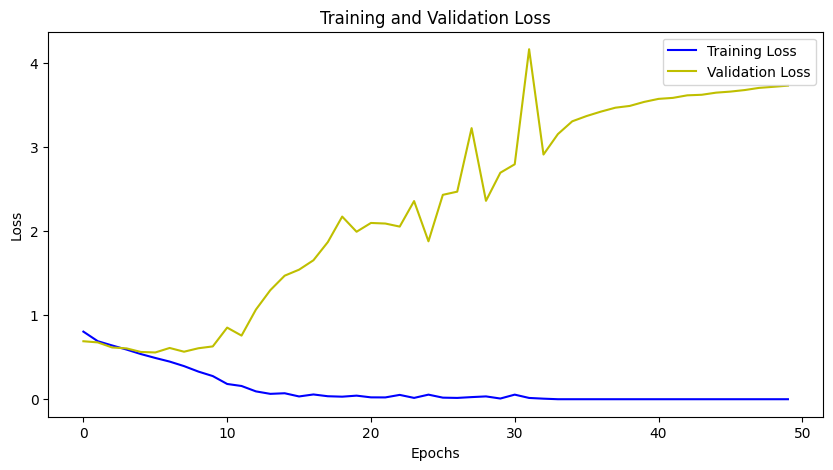

In [17]:
plot_acc_loss(acc, val_acc, loss, val_loss, epochs)

Clearly, the our classifier overfitted. If you can look at the plots above, there is so much gap between the training and validation accuracy/loss.

The classifier is overly confident at recognizing training images, but not so good when evaluated on the validation images.

This goes to show that data augmentation is very useful technique. By just expanding the images, and introducing different image scenes, overfitting can potentially be handled. That is what we are going to do iin the next section.

<a name='3'></a>

## 3. Image Augmentation with ImageDataGenerator


`ImageDataGenerator` is a powerful Keras image processing functionality used to augment images. It is a part of [image data processing functions](https://keras.io/api/preprocessing/image/).

The single most advantage of ImageDataGenerator is that it allows you to augment images in realtime, as you load them from a directory for example.

The orginal directory of the data is not affected at all. The image will be loaded & augmented at the same time, while not affecting the orginal directory.

<a name='3-1'></a>

### 3.1 Loading the Data Again

In [18]:
# Download the data into the workspace

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip


# Extract the zip file

zip_dir = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(zip_dir, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Get training and val directories

main_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(main_dir, 'train')
val_dir = os.path.join(main_dir, 'validation')

train_cat_dir = os.path.join(train_dir, 'cats')
train_dog_dir = os.path.join(train_dir, 'dogs')

val_cat_dir = os.path.join(val_dir, 'cats')
val_dog_dir = os.path.join(val_dir, 'dogs')

--2023-09-06 11:04:36--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.207, 74.125.135.207, 173.194.203.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   179MB/s    in 0.4s    

2023-09-06 11:04:37 (179 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



<a name='3-2'></a>

### 3.2 Apply Data Augmentation

We are going to use `ImageDataGenerator` to generate augmented images.


Below are some of the options available in [ImageDataGenerator](https://keras.io/api/preprocessing/image/) and their explainations.

```
train_imagenerator = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
```

* **rotation_range** is a value in degrees (0–180) to randomly rotate images.

* **width_shift and height_shift** are ranges of fraction of total width or height within which to translate pictures, either vertically or horizontally.

* **shear_range** is for applying shearing randomly.

* **zoom_range** is for zooming pictures randomly.

* **horizontal_flip** is for flipping half of the images horizontally. There is also `vertical_flip` option.

* **fill_mode** is for completing newly created pixels, which can appear after a rotation or a width/height shift.


See the [documentation](https://keras.io/api/preprocessing/image/), it is an interesting read, and there are more preprocessing functions that you might need in your future projects.

Let's see this in practice! We will start by creating `train_imagenerator` which is an image generator for training set.



In [19]:
# Creating training image data generator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_imagenerator = ImageDataGenerator(

    rescale=1/255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'

)

We will also create `val_imagenerator`, but different to training generator, there are no augmentation. It's only rescaling the images pixels to values between 0 and 1. Images pixels are normally between 0 and 255. Rescaling the values improve the performance of the neural network and reduce training time as well.

In [20]:
# Validation image generator

val_imagenerator = ImageDataGenerator(rescale=1/255.)

After creating train and validation generators, let's use `image_dataset_from_directory function` to generate a TensorFlow dataset from images files located in our two directories.

Below is how training and validation directories are structured:

```
cats_dogs_filtered/
..train/
....cats/
......cat.0.jpg
......cat.1.jpg
......cat.2.jpg
....dogs/
......dog.0.jpg
......dog.1.jpg
......dog.2.jpg
..validation/
....cats/
......cat.0.jpg
......cat.1.jpg
....dogs/
......dog.0.jpg
......dog.1.jpg
```

In [21]:
# Load training images in batches of 20 while applying aumgmentation

batch_size = 20
target_size = (180,180)

train_generator = train_imagenerator.flow_from_directory(
        train_dir, #parent directory must be specified
        target_size = target_size, # All images will be resized to (180,180)
        batch_size=batch_size,
        class_mode='binary' # since we need binary labels(0,1) and we will use binary_crossentropy

)

Found 2000 images belonging to 2 classes.


In [22]:
val_generator = val_imagenerator.flow_from_directory(
        val_dir, #parent directory must be specified
        target_size = target_size, # All images will be resized to (180,180)
        batch_size=batch_size,
        class_mode='binary' # since we need binary labels(0,1) and we will use binary_crossentropy

)

Found 1000 images belonging to 2 classes.


Another great advantage of `ImageDataGenerator` is that it generates the labels of the images based off their folders. During the model training, we won't need to specify the labels.

We are ready to train our machine learning model now, but before we could try to visualize the augmented images.

<a name='3-3'></a>

### 3.3 Visualizing Augmented Images

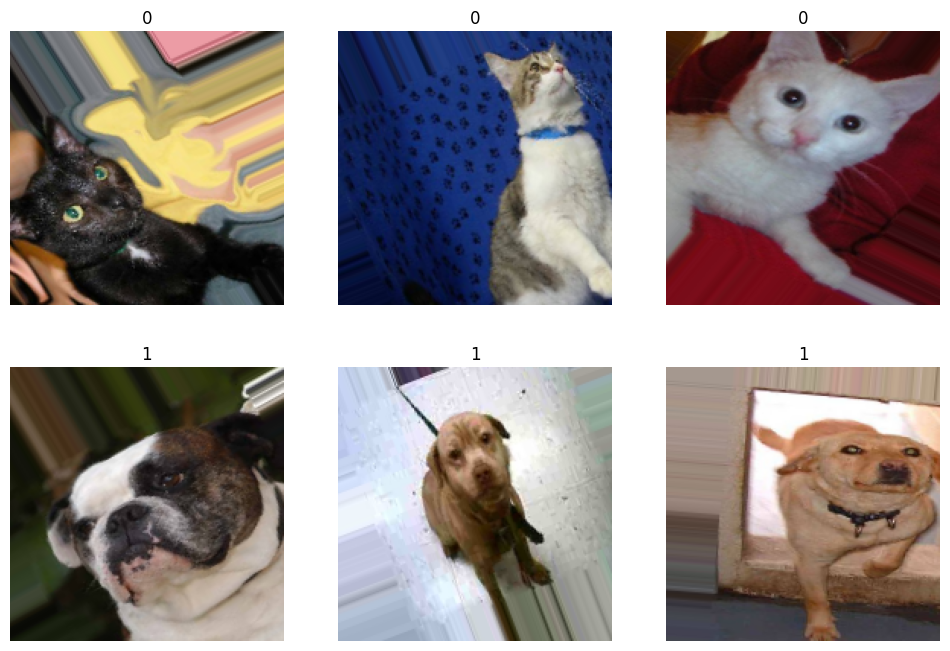

In [23]:
# Get images in batch of 20
augmented_image, label = train_generator.next()

plt.figure(figsize=(12,8))
for i in range(6):
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(augmented_image[i])
        plt.title(int(label[i]))
        plt.axis("off")

It may be hard to spot since we are not comparing them with non augmented images, but if you can observe well, some images are zoomed in, rotated, and flipped horizantally.

Below images are not augmented. You can see that no zoom were applied for example.

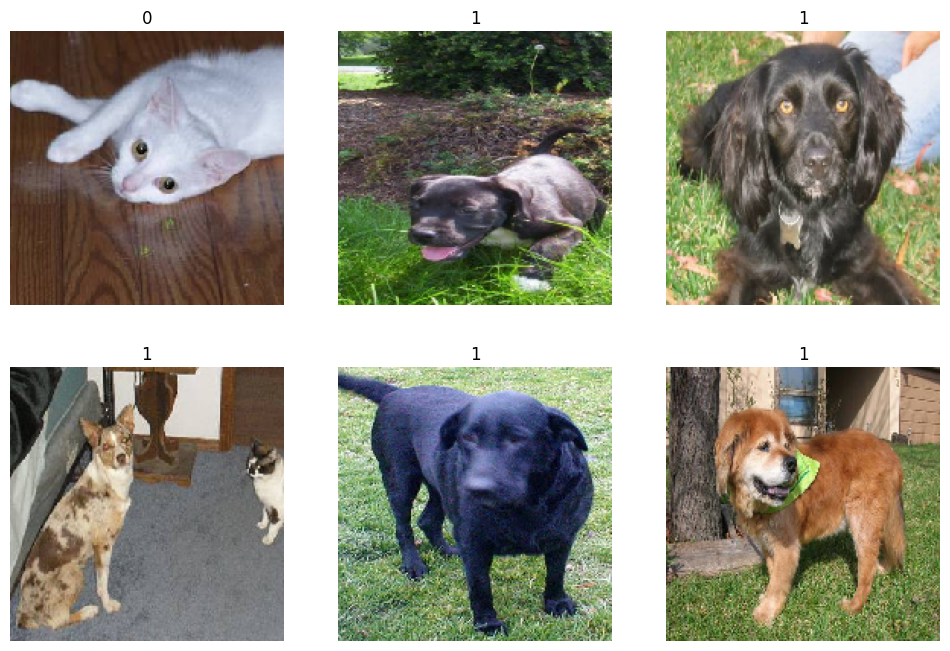

In [24]:
non_augmented_image, label = train_data.next()

plt.figure(figsize=(12,8))
for i in range(6):
        ax = plt.subplot(2, 3, i + 1)
        plt.imshow(non_augmented_image[i])
        plt.title(int(label[i]))
        plt.axis("off")

Now that we have visualized the augmented images, let's retrain the model on augmented images.

<a name='3-4'></a>

### 3.4 Retraining a Model on Augmented Images

You noticed that during training, we didn't have to provide the labels. `ImageDataGenerator` took care of it. As the images are loaded from their directories(cats, dogs), they are augmented and labelled at the same time.

Another thing we can shed light on is the batch size. We have loaded our images in batch size of 20. Usually, the default batch size is 32. The value of the batch size only affect training time. The larger the size, the faster the training, and the smaller the size, the slower the training.

The only issue with the large batch size is that it would requires many steps per epoch in order to give optimal model performance. I have merely used 20 based off the number of images we have in both sets, to facilitate the computation and steps per epochs. But a rule of thumb is to always start with 32. There is this great paper that talks about that: [Practical recommendations for gradient-based training of deep architectures - Yoshua Bengio](https://arxiv.org/pdf/1206.5533.pdf).


To be able to see what the difference data augmentation will make, we will use the same model as before. Let's call it.



In [25]:
model_2 = classifier()

batch_size = 20

train_steps = 2000/batch_size
val_steps = 1000/batch_size

history_2 = model_2.fit(
      train_generator,
      steps_per_epoch=train_steps,
      epochs=100,
      validation_data=val_generator,
      validation_steps=val_steps)

Epoch 1/100
100/100 [==============================] - 20s 188ms/step - loss: 0.7758 - accuracy: 0.5075 - val_loss: 0.6931 - val_accuracy: 0.5050
Epoch 2/100
100/100 [==============================] - 19s 188ms/step - loss: 0.6947 - accuracy: 0.5215 - val_loss: 0.6765 - val_accuracy: 0.6280
Epoch 3/100
100/100 [==============================] - 21s 211ms/step - loss: 0.6793 - accuracy: 0.5855 - val_loss: 0.6371 - val_accuracy: 0.6480
Epoch 4/100
100/100 [==============================] - 18s 184ms/step - loss: 0.6554 - accuracy: 0.6255 - val_loss: 0.6379 - val_accuracy: 0.6260
Epoch 5/100
100/100 [==============================] - 19s 192ms/step - loss: 0.6318 - accuracy: 0.6390 - val_loss: 0.6092 - val_accuracy: 0.6720
Epoch 6/100
100/100 [==============================] - 18s 183ms/step - loss: 0.6246 - accuracy: 0.6465 - val_loss: 0.5904 - val_accuracy: 0.6720
Epoch 7/100
100/100 [==============================] - 19s 193ms/step - loss: 0.6114 - accuracy: 0.6595 - val_loss: 0.6134 -

<a name='3-5'></a>

### 3.5 Visualizing The Model Results

In [26]:
model_history_2 = history_2.history

acc = model_history_2['accuracy']
val_acc = model_history_2['val_accuracy']
loss = model_history_2['loss']
val_loss = model_history_2['val_loss']

epochs = history_2.epoch

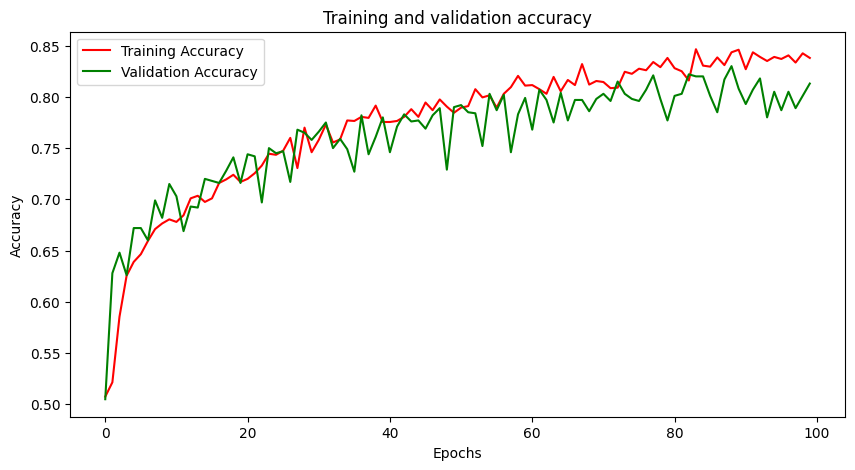

<Figure size 640x480 with 0 Axes>

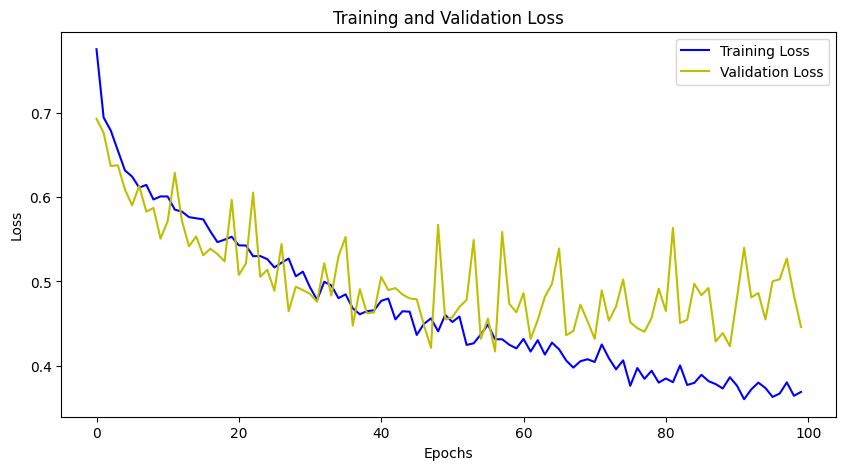

In [27]:
plot_acc_loss(acc, val_acc, loss, val_loss, epochs)

This is not excellent, but it's alot better than the results we had without data augmentation. you remember that our model was overfitting, but now although it's not smooth, there is a big improvement.

How to improve the results? One might try to tweak layers and filters. Machine Learning is very experimental. It's rare that the first model will work well. The result is a function of time and experimentation.

So, in this case, we can try pretrained models. Pretrained models are open source models that are built by other engineers(often researchers) and we can use them instead of building a network from scratch.

The technique of reusing a pretrained model into a given(similar) task is called [`transfer learning`](https://jeande.medium.com/transfer-learning-explained-a80d38ee1564). Although this will be covered in the next notebook, let's give it a shot right away.



<a name='3-6'></a>

### 3.6 Further Improvements: Using Pretrained Models

Pretrained models works so well for many problems, without the need of building models from scratch.

Imagine how far you get by standing on the shoulder of the giant! By using powerful models trained on big datasets, the results are pretty impressive.

Let's practice that. For more about pretrained models, check the next notebook.

You can find available pretrained models in Keras on Keras [Applications](https://keras.io/api/applications/).

In [28]:
pretrained_base_model = keras.applications.InceptionResNetV2(
    weights='imagenet',
    include_top=False, # Drop imagenet classifier on the top
    input_shape=(180,180,3)

)

219055592/219055592 [==============================] - 5s 0us/step


We then freeze the pretrained base model to avoid retraining the bottom layers.

In [29]:
for layer in pretrained_base_model.layers:
  layer.trainable = False

Let's see the summary of the base model.

In [30]:
pretrained_base_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 180, 180, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 89, 89, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 89, 89, 32)  96          ['conv2d_6[0][0]']               
 alization)                                                                                       
                                                                                

Let's create a new model on top of the pretrained network.

In [31]:
# Define the input shape
inputs = tf.keras.Input(shape=(180, 180, 3))

# stack the inputs to pretrained model and set training to false
x = pretrained_base_model(inputs, training=False)

# Add a pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Add drop out layer

x = tf.keras.layers.Dropout(0.4)(x)

# Last output dense layer with 1 unit and sigmoid
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Build a model
model_3 = tf.keras.Model(inputs, output)

Now let's compile the model and train on our augmented data.

In [32]:
model_3.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics='accuracy'

)

In [33]:
history_3 = model_3.fit(
      train_generator,
      steps_per_epoch=train_steps,
      epochs=25,
      validation_data=val_generator,
      validation_steps=val_steps)

Epoch 1/25
100/100 [==============================] - 39s 264ms/step - loss: 0.2193 - accuracy: 0.9135 - val_loss: 0.0524 - val_accuracy: 0.9830
Epoch 2/25
100/100 [==============================] - 22s 222ms/step - loss: 0.1316 - accuracy: 0.9515 - val_loss: 0.0518 - val_accuracy: 0.9830
Epoch 3/25
100/100 [==============================] - 23s 232ms/step - loss: 0.1071 - accuracy: 0.9645 - val_loss: 0.0667 - val_accuracy: 0.9800
Epoch 4/25
100/100 [==============================] - 23s 234ms/step - loss: 0.1050 - accuracy: 0.9645 - val_loss: 0.0534 - val_accuracy: 0.9810
Epoch 5/25
100/100 [==============================] - 23s 234ms/step - loss: 0.1205 - accuracy: 0.9600 - val_loss: 0.0444 - val_accuracy: 0.9840
Epoch 6/25
100/100 [==============================] - 23s 232ms/step - loss: 0.1017 - accuracy: 0.9655 - val_loss: 0.0478 - val_accuracy: 0.9850
Epoch 7/25
100/100 [==============================] - 23s 228ms/step - loss: 0.0941 - accuracy: 0.9630 - val_loss: 0.0463 - val_ac

This is so impressive, over 96% accuracy on training. You can see we didn't have to even train for 25 epochs, 10 would give great results. Let's plot the results and also later change the epochs to 10.

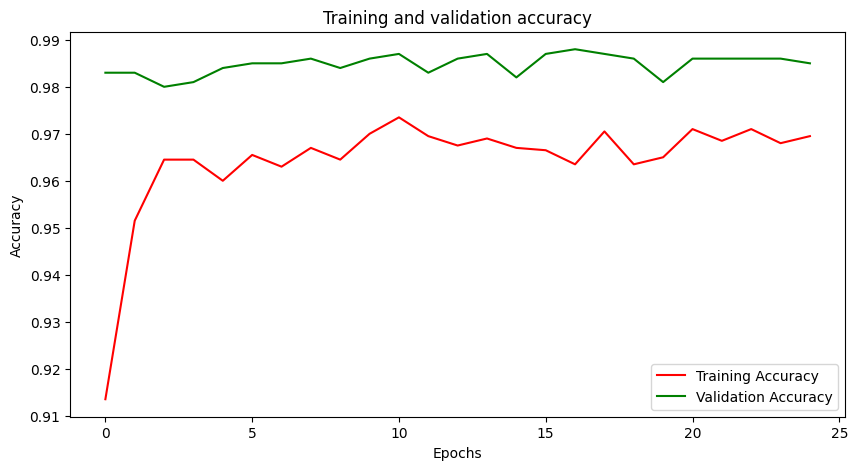

<Figure size 640x480 with 0 Axes>

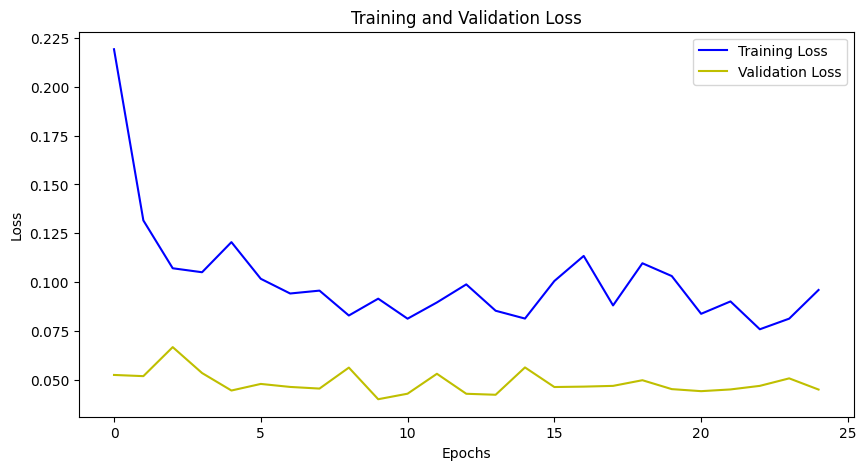

In [34]:
model_history_3 = history_3.history

acc = model_history_3['accuracy']
val_acc = model_history_3['val_accuracy']
loss = model_history_3['loss']
val_loss = model_history_3['val_loss']

epochs = history_3.epoch

plot_acc_loss(acc, val_acc, loss, val_loss, epochs)

We have said that using a pretrained model is like standing on the shoulder of the giant. And that's pretty clear on the above graph, the accuracy started at ~90%.

N.B. Calling model.fit(...) continue where the training left. To avoid adding up on previous training, you have to redefine & compile the model.

In [35]:
# Define the input shape
inputs = tf.keras.Input(shape=(180, 180, 3))

# stack the inputs to pretrained model and set training to false
x = pretrained_base_model(inputs, training=False)

# Add a pooling layer
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# Add drop out layer

x = tf.keras.layers.Dropout(0.4)(x)

# Last output dense layer with 1 unit and sigmoid
output = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Build a model
model_4 = tf.keras.Model(inputs, output)


In [36]:
model_4.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics='accuracy'

)

In [37]:
# Train for 10 epochs

history_4 = model_4.fit(
      train_generator,
      steps_per_epoch=train_steps,
      epochs=10,
      validation_data=val_generator,
      validation_steps=val_steps)

Epoch 1/10
100/100 [==============================] - 42s 308ms/step - loss: 0.2679 - accuracy: 0.8910 - val_loss: 0.0709 - val_accuracy: 0.9750
Epoch 2/10
100/100 [==============================] - 23s 233ms/step - loss: 0.1349 - accuracy: 0.9485 - val_loss: 0.0586 - val_accuracy: 0.9790
Epoch 3/10
100/100 [==============================] - 23s 229ms/step - loss: 0.1325 - accuracy: 0.9510 - val_loss: 0.0558 - val_accuracy: 0.9790
Epoch 4/10
100/100 [==============================] - 24s 237ms/step - loss: 0.1229 - accuracy: 0.9570 - val_loss: 0.0512 - val_accuracy: 0.9830
Epoch 5/10
100/100 [==============================] - 24s 243ms/step - loss: 0.1191 - accuracy: 0.9585 - val_loss: 0.0475 - val_accuracy: 0.9830
Epoch 6/10
100/100 [==============================] - 24s 241ms/step - loss: 0.0997 - accuracy: 0.9625 - val_loss: 0.0507 - val_accuracy: 0.9840
Epoch 7/10
100/100 [==============================] - 24s 236ms/step - loss: 0.0857 - accuracy: 0.9700 - val_loss: 0.0615 - val_ac

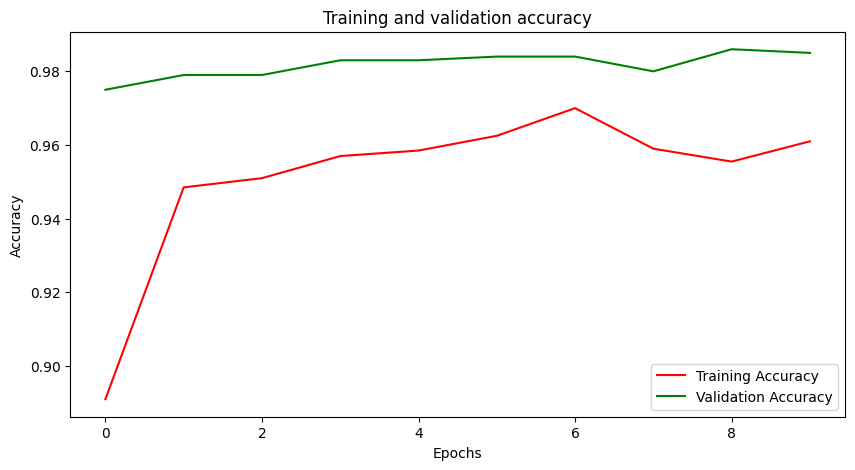

<Figure size 640x480 with 0 Axes>

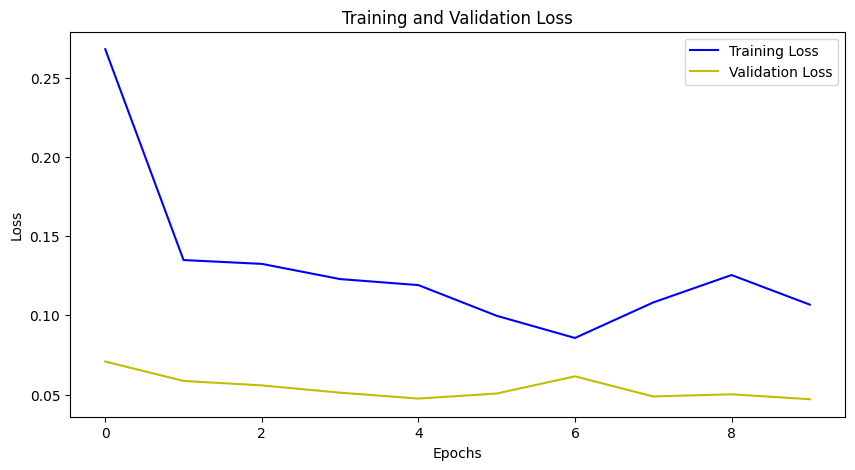

In [38]:
model_history_4 = history_4.history

acc = model_history_4['accuracy']
val_acc = model_history_4['val_accuracy']
loss = model_history_4['loss']
val_loss = model_history_4['val_loss']

epochs = history_4.epoch

plot_acc_loss(acc, val_acc, loss, val_loss, epochs)

The reason why validation accuracy is better than training accuracy, or why validation loss is less than training loss, it's because the pretrained model has Batch Normalization and dropout layers. These regularization layers affects the accuracy during training, but they are turned off during validation.

Also, during the training, accuracy and loss are averaged per epoch, while during validation phase, accuracy and loss are computed on a model that has already trained longer.

You can notice this if you keep the eye on progress bar during the training. The training metrics change per step/epoch, and at the end of the epoch, the average loss/accuracy are reported. On the other hand, the validation metrics are computed after training on each epoch.

<a name='3-7'></a>

### 3.7 Saving, Loading, and Testing a Model on New Images

In [39]:
# Saving a model

model_4.save('final_model.h5')

# or

#tf.keras.models.save_model(model_4, 'final_model.h5')

In [40]:
# load a saved model

loaded_model = tf.keras.models.load_model('/content/final_model.h5')

In [41]:
# function to download some images from the internet

def get_image(image_name,url):

  image = tf.keras.utils.get_file(image_name,url)

  return image

In [42]:
# Urls of cats and dogs images

cat_1 = 'https://upload.wikimedia.org/wikipedia/commons/b/b6/Felis_catus-cat_on_snow.jpg'
cat_2 = 'https://upload.wikimedia.org/wikipedia/commons/6/69/June_odd-eyed-cat_cropped.jpg'

dog_1 = 'https://upload.wikimedia.org/wikipedia/commons/b/b5/2008-08-28_White_German_Shepherd_ready.jpg'
dog_2 = 'https://upload.wikimedia.org/wikipedia/commons/d/df/Dogs_were_not_around_in_the_early_Cenozoic.png'

In [43]:
cat_im1 = get_image('cat_1',cat_1)
cat_im2 = get_image('cat_2',cat_2)

dog_im1 = get_image('dog_1',dog_1)
dog_im2 = get_image('dog_2',dog_2)

1959233/1959233 [==============================] - 0s 0us/step


In [44]:
def predict(model, image):
  ''' Take model & image, preprocess image, make predictions, and return results'''

  image = tf.keras.preprocessing.image.load_img(image, target_size=(180,180))
  image = tf.keras.preprocessing.image.img_to_array(image)
  image = image/255.0
  image = tf.expand_dims(image, 0)

  predicted_class = model.predict(image)[0]
  rounded_predicted_class = tf.round(predicted_class)

  print(f"DISPLAYING THE PREDICTION RESULTS:\n \
    ---------- \n \
    Predicted class probability: {predicted_class}\n \
    Predicted class: {rounded_predicted_class}\n \
    Predicted class name: {'Dog' if rounded_predicted_class == 1 else 'Cat'}")

1/1 [==============================] - 4s 4s/step
DISPLAYING THE PREDICTION RESULTS:
     ---------- 
     Predicted class probability: [0.9974753]
     Predicted class: [1.]
     Predicted class name: Dog


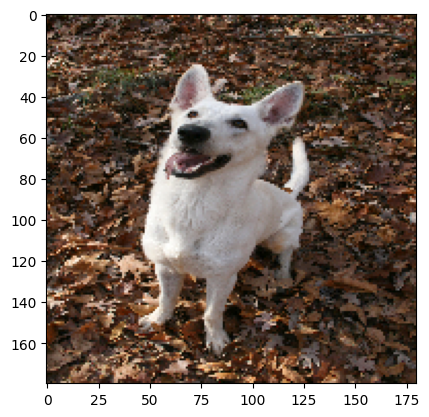

In [45]:
predict(loaded_model, dog_im1)
plt.imshow(tf.keras.preprocessing.image.load_img(dog_im1, target_size=(180,180)));

1/1 [==============================] - 0s 39ms/step
DISPLAYING THE PREDICTION RESULTS:
     ---------- 
     Predicted class probability: [0.00094731]
     Predicted class: [0.]
     Predicted class name: Cat


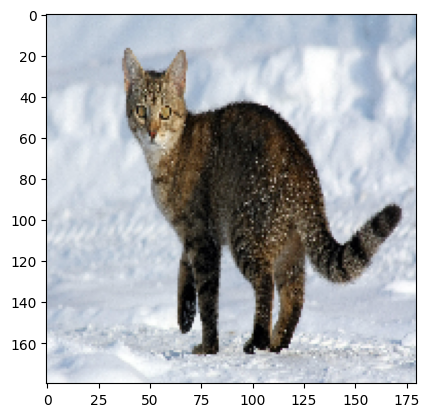

In [46]:
predict(loaded_model, cat_im1)
plt.imshow(tf.keras.preprocessing.image.load_img(cat_im1, target_size=(180,180)));

1/1 [==============================] - 0s 38ms/step
DISPLAYING THE PREDICTION RESULTS:
     ---------- 
     Predicted class probability: [0.9996532]
     Predicted class: [1.]
     Predicted class name: Dog


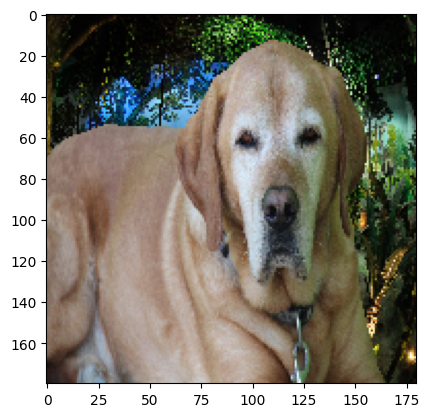

In [47]:
predict(loaded_model, dog_im2)
plt.imshow(tf.keras.preprocessing.image.load_img(dog_im2, target_size=(180,180)));

1/1 [==============================] - 0s 52ms/step
DISPLAYING THE PREDICTION RESULTS:
     ---------- 
     Predicted class probability: [3.0269626e-05]
     Predicted class: [0.]
     Predicted class name: Cat


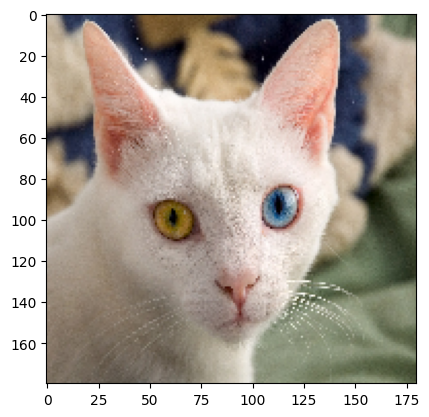

In [48]:
predict(loaded_model, cat_im2)
plt.imshow(tf.keras.preprocessing.image.load_img(cat_im2, target_size=(180,180)));